<a href="https://colab.research.google.com/github/VKSi/2020_11_GB_TimeSeries/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Временные ряды 1. Введение в задачу анализа временных рядов

## Задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

## Ответы

### Задание №1

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

#### Вспомним определение: 
Временным рядом принято называть последовательно измеренные через некоторые (зачастую равные) промежутки времени данные

    а) зависимость цены на недвижимость в конкретном регионе от времени
    Так как в описании набора упомянута зависимость от времени, данные можно интерпритировать как временной ряд

    б) скорость полета самолета при перелете из аэропорта А в аэропорт В
    Если речь идет о средней скорости за время всего полета, то она не зависит от вермени, так как является агрегированной величиной.
    Если мы будем рассматривать изменение скорости в течение полета, то это будет  временной ряд

    в) количество отказов компьютера
    Как и в предыдущем примере. Если речь идет об агрегированной величине, то нельзя. Если об изменении величины со временем при дискретном измерении, то можно интерпретировать как временной ряд

    г) число обращений в поликлинику по району
    Уже даже не интересно. Или наоборот интересно, а чем это все отличается? Ответ такой же как в предыдущих заданиях

    д) координаты автобуса при движении по маршруту
    См. ответ про скорость самолета. Нет разницы что мы измеряем.

    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
    И еще раз о том же

### Задание №2

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 

In [ ]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [ ]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Интервал времени наблюдений находится между 2005-12-31 01:00:00 и 2018-01-02 00:00:00

Все значения ненулевые (нет пропусков в данных, но не факт что в самих наблюдениях), числовые с плавающей точкой

In [ ]:
(data['DUQ_MW'] * 10 % 10 != 0).sum()

0

На самом деле все они целочисленные. Сразу исправим это

In [ ]:
data['value'] = data['DUQ_MW'].astype(int)

In [ ]:
data.drop('DUQ_MW', axis = 'columns', inplace = True)

Чтобы проще изучить разметку, добавим ее в отдельную колонку

In [ ]:
data['date_time'] = data.index

In [ ]:
data.head()

,value,date_time
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [ ]:
len(data.date_time.unique())

119064

In [ ]:
data.date_time.min()

Timestamp('2005-01-01 01:00:00')

NB! из data.info() мы сделали вывод, что минимальное значение даты - 31.12.2005, однако, это не так!

In [ ]:
data.date_time.max()

Timestamp('2018-08-03 00:00:00')

NB! из data.info() мы сделали вывод, что максимальное значение даты - 02.01.2018, однако, это не так!

Это значит, что часть данных в нашей выборке расположено не в хронологическом порядке.    
Нужно это исправить:

In [ ]:
data = data.sort_index()

Создадим свой календарь идеальной разметки

In [ ]:
my_calendar_h = pd.date_range(data.date_time.min(), data.date_time.max(), freq="H")

In [ ]:
my_calendar_h.shape

(119088,)

Итак, наши данные имеют 119,068 наблюдений, из которых уникальных по времени только 119,064. При этом идеальный календарь на этот период содержит 119,088 значений.    

Это значит что, во-первых, среди наблюдений есть повторения (не более 4-х значений исходя из принципа Дирихле); во-вторых, есть пропуски (не менее 24, точное количество зависит от комбинации дублирования).

Найдем их:

In [ ]:
dulicates = pd.DataFrame(data.date_time.value_counts()[:4])
dulicates['DOW'] = dulicates.index.day_name()
dulicates.sort_index()

,date_time,DOW
2014-11-02 02:00:00,2,Sunday
2015-11-01 02:00:00,2,Sunday
2016-11-06 02:00:00,2,Sunday
2017-11-05 02:00:00,2,Sunday


Таким образом все  дубликаты происходили по первым воскресеньям ноября в 2 часа утра и, очевидно, связаны с переводом часов.     
Следует обратить внимание на то, что такое дублирование найдено не по всем годам, что непоследовательно.

In [ ]:
missing_obs = pd.DataFrame(index = set(my_calendar_h) - set(data.date_time), columns=['DOW', 'month'])
print(f'Количество пропущенных значений = {missing_obs.shape[0]}')
missing_obs['missing_obs'] = missing_obs.index
missing_obs['month'] = missing_obs.index.month
missing_obs['DOW'] = missing_obs.index.day_name()

Количество пропущенных значений = 24


In [ ]:
missing_obs[missing_obs.month == 3].sort_index()

,DOW,month,missing_obs
2007-03-11 03:00:00,Sunday,3,2007-03-11 03:00:00
2008-03-09 03:00:00,Sunday,3,2008-03-09 03:00:00
2009-03-08 03:00:00,Sunday,3,2009-03-08 03:00:00
2010-03-14 03:00:00,Sunday,3,2010-03-14 03:00:00
2011-03-13 03:00:00,Sunday,3,2011-03-13 03:00:00
2012-03-11 03:00:00,Sunday,3,2012-03-11 03:00:00
2013-03-10 03:00:00,Sunday,3,2013-03-10 03:00:00
2014-03-09 03:00:00,Sunday,3,2014-03-09 03:00:00
2015-03-08 03:00:00,Sunday,3,2015-03-08 03:00:00
2016-03-13 03:00:00,Sunday,3,2016-03-13 03:00:00


Видно, что 12 пропусков связаны с весенним переводом часов. Не хватает 2005 и 2006 годов

In [ ]:
missing_obs[missing_obs.month == 11].sort_index()

,DOW,month,missing_obs
2007-11-04 02:00:00,Sunday,11,2007-11-04 02:00:00
2008-11-02 02:00:00,Sunday,11,2008-11-02 02:00:00
2009-11-01 02:00:00,Sunday,11,2009-11-01 02:00:00
2010-11-07 02:00:00,Sunday,11,2010-11-07 02:00:00
2011-11-06 02:00:00,Sunday,11,2011-11-06 02:00:00
2012-11-04 02:00:00,Sunday,11,2012-11-04 02:00:00
2013-11-03 02:00:00,Sunday,11,2013-11-03 02:00:00


Еще 7 пропусков приходятся на "не найденные" в дубликатах первые воскресения ноября с 2007 по 2013 годы.    
Пропуск этих значение не очень логичен, логичнее было бы увидеть их в дубликатах.   
NB! ноябрь 2005 и 2006 годов отсутствует и в дубликатах и в пропущенных значениях.

In [ ]:
missing_obs[(missing_obs.month != 3) & (missing_obs.month != 11)].sort_index()

,DOW,month,missing_obs
2005-04-03 03:00:00,Sunday,4,2005-04-03 03:00:00
2005-10-30 02:00:00,Sunday,10,2005-10-30 02:00:00
2006-04-02 03:00:00,Sunday,4,2006-04-02 03:00:00
2006-10-29 02:00:00,Sunday,10,2006-10-29 02:00:00
2010-12-10 00:00:00,Friday,12,2010-12-10 00:00:00


Найден "ноябрь" 2005 и 2006 годов - видимо часы переводили в конце октября

Найден "март" 2005 и 2006 годов - видимо часы переводили в апреле.     
NB! Оба предположения в "рабочей" ситуации должны быть подтверждены информационными источниками

Единственный ни к чему очевидному не привязанный пропуск = полночь пятницы 10.12.2010

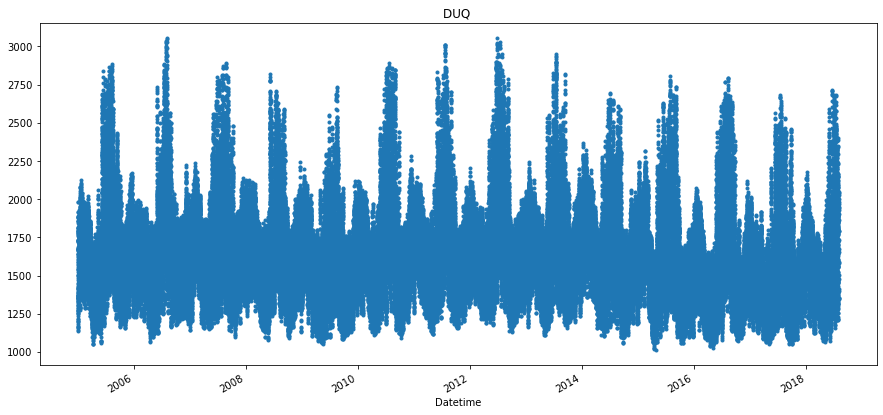

In [ ]:
_ = data.value.plot( style='.', figsize=( 15, 7 ), title='DUQ ' )

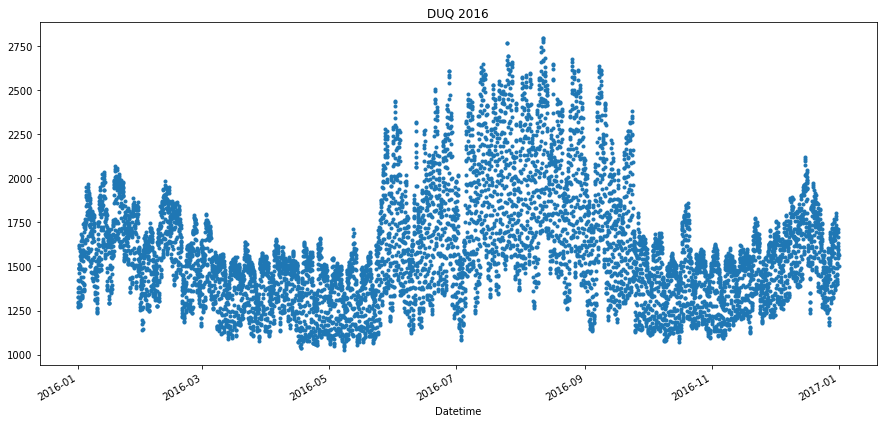

In [ ]:
_ = data['2016'].value.plot( style='.', figsize=( 15, 7 ), title='DUQ 2016' )

На графике видно, что данные потребления колеблются примерно от 1000 до 3000.     
Наблюдается периодичность с двумя пиками - меньшим и большим. По графику 2016 года можно предположить, что эти пики сезонные (больший - август, меньший - декабрь). 

### Задание №3

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [ ]:
data = pd.read_csv('нефть-brent 2010-2019.csv', index_col=[0], parse_dates=[0])

In [ ]:
data.head()

,Значение
Дата,
2019-01-09,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Для удобства переименуем название индекса и колонки

In [ ]:
data.rename(columns = {'Значение':'value'}, inplace = True)
data.index.rename('date', inplace = True)

Отсортируем по индексу

In [ ]:
data.sort_index(inplace = True)
data.head()

,value
date,
2010-01-09,76.37
2010-01-10,83.81
2010-01-11,84.59
2010-01-12,88.92
2010-02-09,76.89


In [ ]:
data.tail()

,value
date,
2019-12-04,71.55
2019-12-05,70.43
2019-12-06,59.78
2019-12-07,67.00
2019-12-08,58.37


Видно, что данные содержат много пропусков

Пересчитаем по неделям:

In [ ]:
data.asfreq('W', method ='pad').head(10)

,value
date,
2010-01-10,83.81
2010-01-17,88.92
2010-01-24,88.92
2010-01-31,88.92
2010-02-07,88.92
2010-02-14,90.64
2010-02-21,90.64
2010-02-28,90.64
2010-03-07,90.64


Видно, что часть недель содержит одинаковые значения, так как приходятся на пропущенные даты

Пересчитаем по масяцам:

In [ ]:
data.asfreq('M', method ='pad').head(10)

,value
date,
2010-01-31,88.92
2010-02-28,90.64
2010-03-31,91.68
2010-04-30,88.13
2010-05-31,91.73
2010-06-30,90.99
2010-07-31,90.90
2010-08-31,91.18
2010-09-30,82.11


NB! Так как речь идет о котировках, нас вполне устраивает зполнение "от последнего" значения, как аналог значения "close"

### Задание №4

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Для группировки и агрегации значений, нам необходимо добавить соответствующие поля в таблицу:

In [ ]:
data['week'] = data.index.isocalendar().week
data['month'] = data.index.month
data['year'] = data.index.year
data.tail()

,value,week,month,year
date,,,,
2019-12-04,71.55,49,12,2019
2019-12-05,70.43,49,12,2019
2019-12-06,59.78,49,12,2019
2019-12-07,67.00,49,12,2019
2019-12-08,58.37,49,12,2019


C:\Users\Me\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


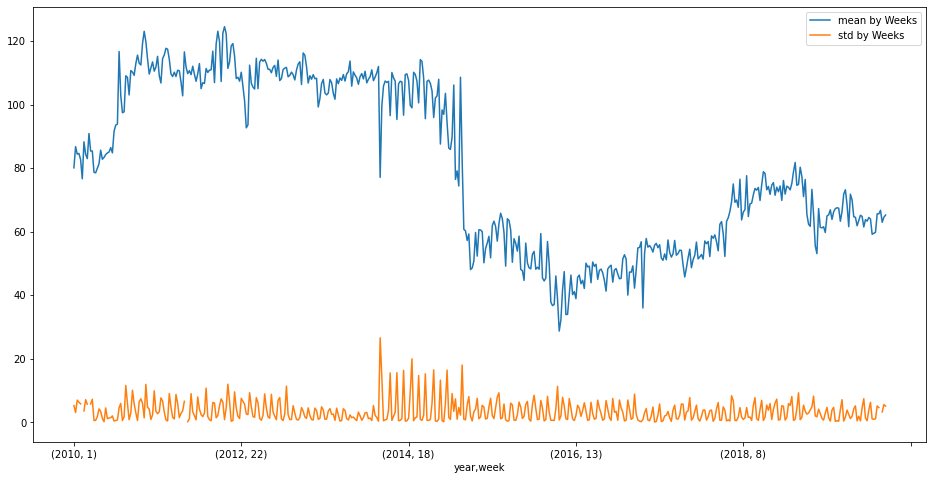

In [ ]:
for ag in ['mean', 'std']:
    data.groupby(['year', 'week']).value.agg(f'{ag}').plot(figsize = (16, 8), label = f'{ag} by Weeks')
plt.legend()
plt.show()

C:\Users\Me\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


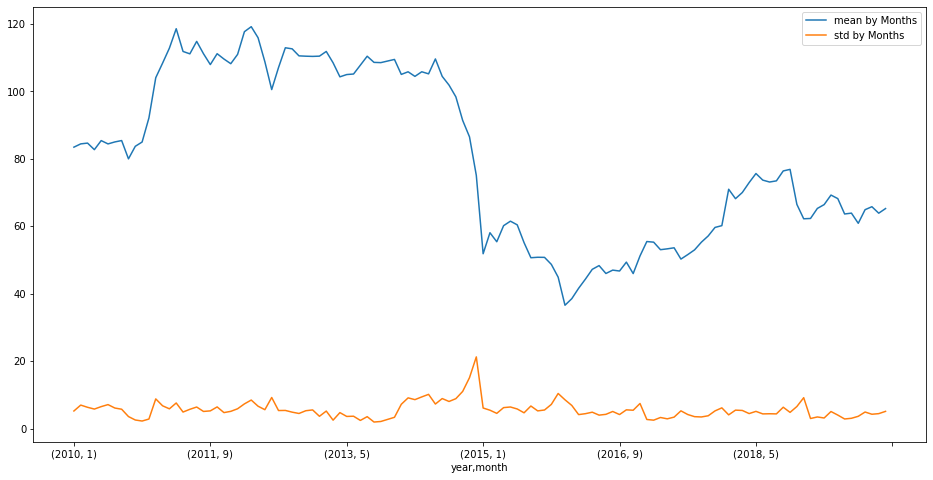

In [ ]:
for ag in ['mean', 'std']:
    data.groupby(['year', 'month']).value.agg(f'{ag}').plot(figsize = (16, 8), label = f'{ag} by Months')
plt.legend()
plt.show()

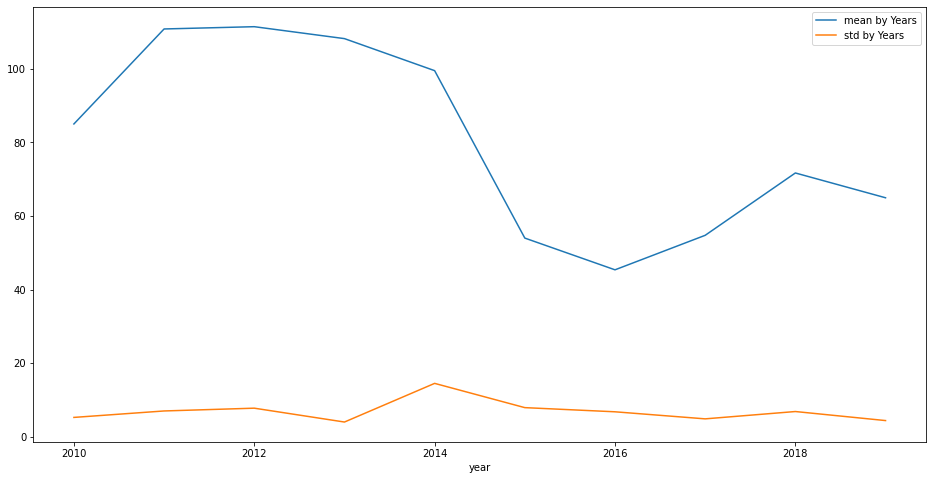

In [ ]:
for ag in ['mean', 'std']:
    data.groupby(['year']).value.agg(f'{ag}').plot(figsize = (16, 8), label = f'{ag} by Years')
plt.legend()
plt.show()

### Задание №5

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Чем крупнее фрейм, тем более гладким кажется поведение цены. Максимальные значения снижаются, минимальные повышаются.     
То же самое касается стандартного отклонения, так как происходит сглаживание